In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('CSUSHPISA.csv')

In [3]:
data

,DATE,CSUSHPISA
0,01-01-1987,63.965
1,01-02-1987,64.424
2,01-03-1987,64.736
3,01-04-1987,65.132
4,01-05-1987,65.563
...,...,...
436,01-05-2023,302.566
437,01-06-2023,304.593
438,01-07-2023,306.767
439,01-08-2023,309.155


In [4]:
# information of Dataset..

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       441 non-null    object 
 1   CSUSHPISA  441 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.0+ KB


In [5]:
# checking the missing value..

data.isnull().sum()

DATE         0
CSUSHPISA    0
dtype: int64

In [6]:
# check the percentage of missing value...

data.isnull().sum()*100/(len(data))

DATE         0.0
CSUSHPISA    0.0
dtype: float64

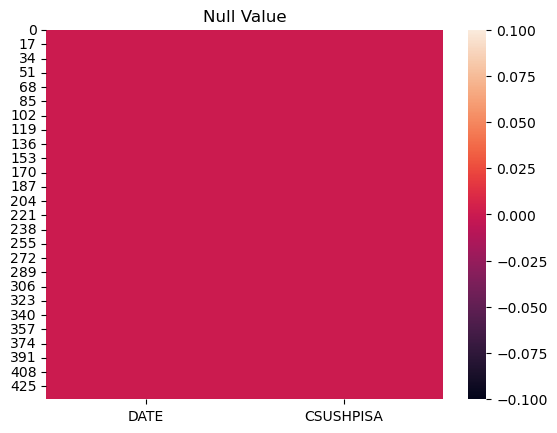

In [7]:
# No Null values shows the heatmap..

sns.heatmap(data.isnull())
plt.title('Null Value')
plt.show()

In [8]:
# check the datatype

data.dtypes

DATE          object
CSUSHPISA    float64
dtype: object

In [9]:
data.describe(include = 'object')

,DATE
count,441
unique,441
top,01-01-1987
freq,1


In [10]:
# check the features in dataset..

numerical_features = [features for features in data.columns if data[features].dtypes !='O']
discrete_features = [features for features in numerical_features if len(data[features].unique())<25]
continous_features = [features for features in numerical_features if features not in discrete_features]
categorical_features = [features for features in data.columns if features not in numerical_features]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete_features Count {}".format(len(discrete_features)))
print("Continous_features Count {}".format(len(continous_features)))
print("Categorical_features Count {}".format(len(categorical_features)))

Numerical Features Count 1
Discrete_features Count 0
Continous_features Count 1
Categorical_features Count 1


In [11]:
data.columns

Index(['DATE', 'CSUSHPISA'], dtype='object')

In [12]:
data['DATE'].dtype

dtype('O')

In [13]:
# check the numerical features in dataset ...

[features for features in data.columns if data[features].dtypes !='O']

['CSUSHPISA']

In [14]:
# check the continous features in dataset ...

[features for features in numerical_features if features not in discrete_features]

['CSUSHPISA']

In [15]:
# Check the categorical features in dataset ...

[features for features in data.columns if features not in numerical_features]

['DATE']

In [16]:
data

,DATE,CSUSHPISA
0,01-01-1987,63.965
1,01-02-1987,64.424
2,01-03-1987,64.736
3,01-04-1987,65.132
4,01-05-1987,65.563
...,...,...
436,01-05-2023,302.566
437,01-06-2023,304.593
438,01-07-2023,306.767
439,01-08-2023,309.155


In [17]:
data.dtypes

DATE          object
CSUSHPISA    float64
dtype: object

In [18]:
# statistical describe..

data.describe()

,CSUSHPISA
count,441.000000
mean,141.910490
std,61.191389
min,63.965000
25%,82.194000
50%,141.029000
75%,178.767000
max,311.175000


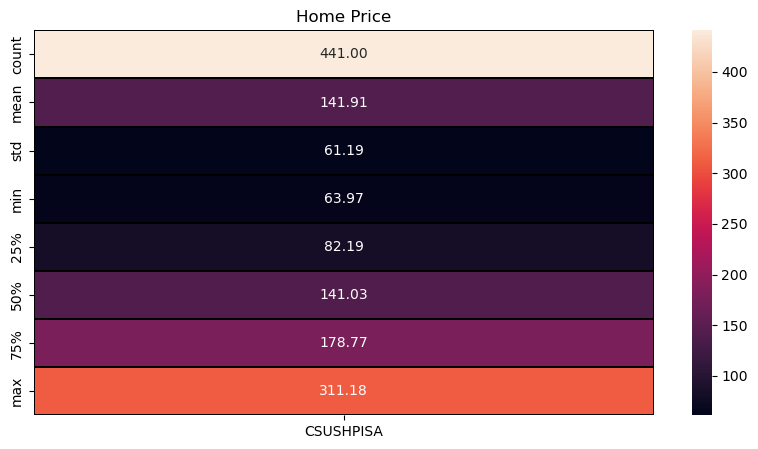

In [19]:
# using heatmap ...

import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.heatmap(data.describe(), annot = True, linewidth = 0.2, linecolor = 'black', fmt = '0.2f')
plt.title('Home Price')
plt.show()

In [20]:
# Data Visualization:

data['CSUSHPISA'].value_counts()

CSUSHPISA
76.056     2
63.965     1
140.010    1
136.533    1
136.607    1
          ..
93.672     1
93.208     1
92.712     1
92.199     1
311.175    1
Name: count, Length: 440, dtype: int64

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

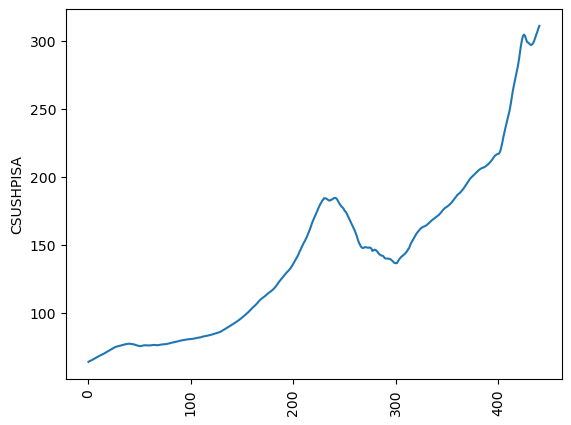

In [21]:
sns.lineplot(data['CSUSHPISA'])
plt.xticks(rotation = 90)

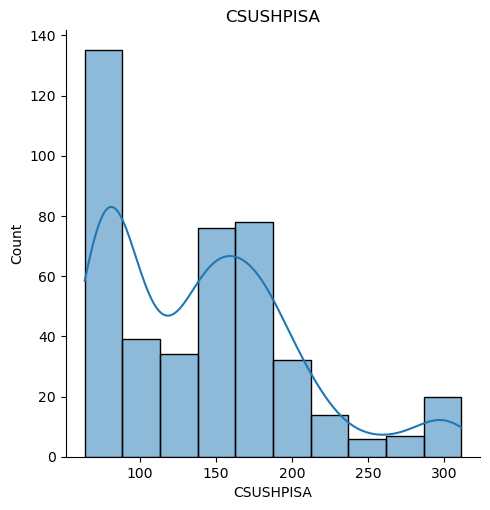

<Figure size 1000x700 with 0 Axes>

In [22]:
for features in continous_features:
    data = data.copy()
    sns.displot(data[features], kde = True)
    plt.xlabel(features)
    plt.ylabel('Count')
    plt.title(features)
    plt.figure(figsize = (10,7))
    plt.show()

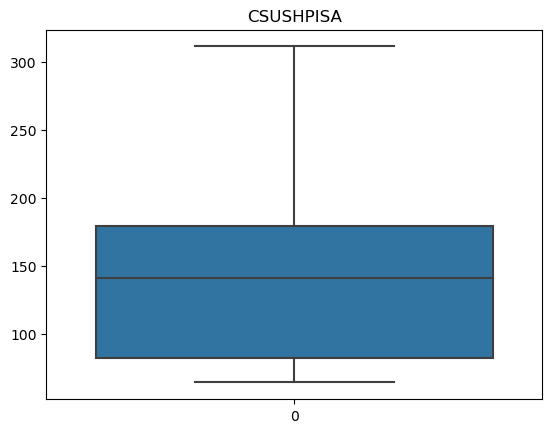

<Figure size 1000x500 with 0 Axes>

In [23]:
# for loop is used to plot a boxplot for all the continous features to see the outliers :

for features in continous_features:
    data = data.copy()
    sns.boxplot(data[features])
    plt.title(features)
    plt.figure(figsize = (10,5))
    plt.show()

In [24]:
# Data Analysis ....

import scipy.stats as stats

CSUSHPISA


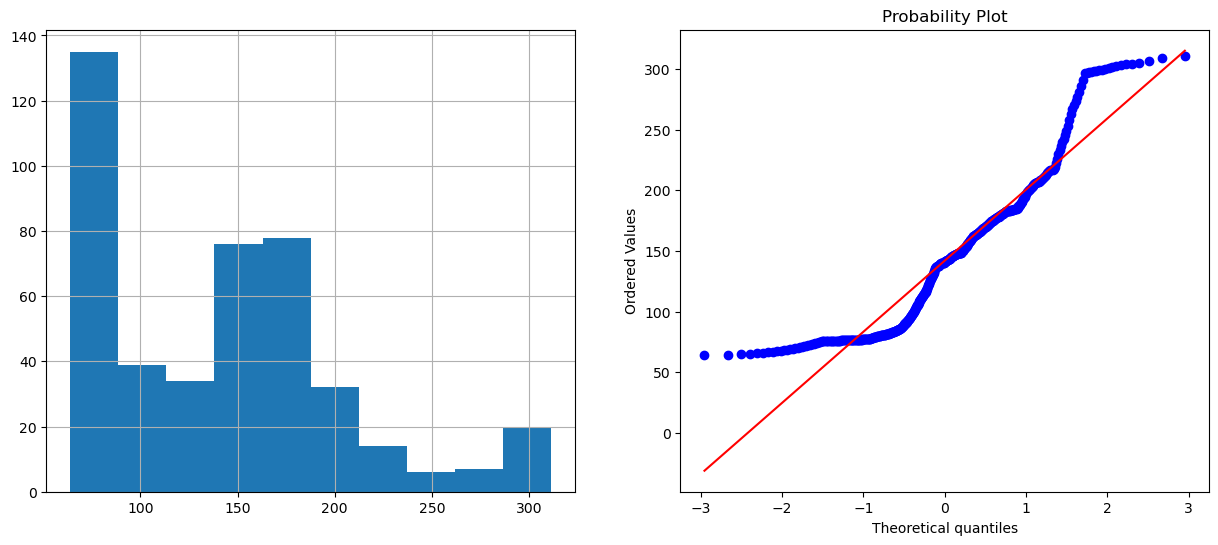

In [25]:
for features in continous_features:
    print(features)
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    data[features].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[features], dist = 'norm', plot = plt)
    plt.show

In [26]:
# condition for efficient prophet model

#1. univariate data    
#2. Prophet is predetermined to forcast daily data   
#3. date ------ ds and variable ---- y
#4. Date should be in date time


data = data.rename(columns = {'DATE' : 'ds', 'CSUSHPISA' : 'y'})
data

,ds,y
0,01-01-1987,63.965
1,01-02-1987,64.424
2,01-03-1987,64.736
3,01-04-1987,65.132
4,01-05-1987,65.563
...,...,...
436,01-05-2023,302.566
437,01-06-2023,304.593
438,01-07-2023,306.767
439,01-08-2023,309.155


In [27]:
# using the label Emcoder method for converting the categorical to numeric value ...

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['ds'] = LE.fit_transform(data['ds'])

In [28]:
data

,ds,y
0,0,63.965
1,37,64.424
2,74,64.736
3,111,65.132
4,148,65.563
...,...,...
436,184,302.566
437,221,304.593
438,258,306.767
439,295,309.155


In [29]:
data.corr()

,ds,y
ds,1.000000,0.083902
y,0.083902,1.000000


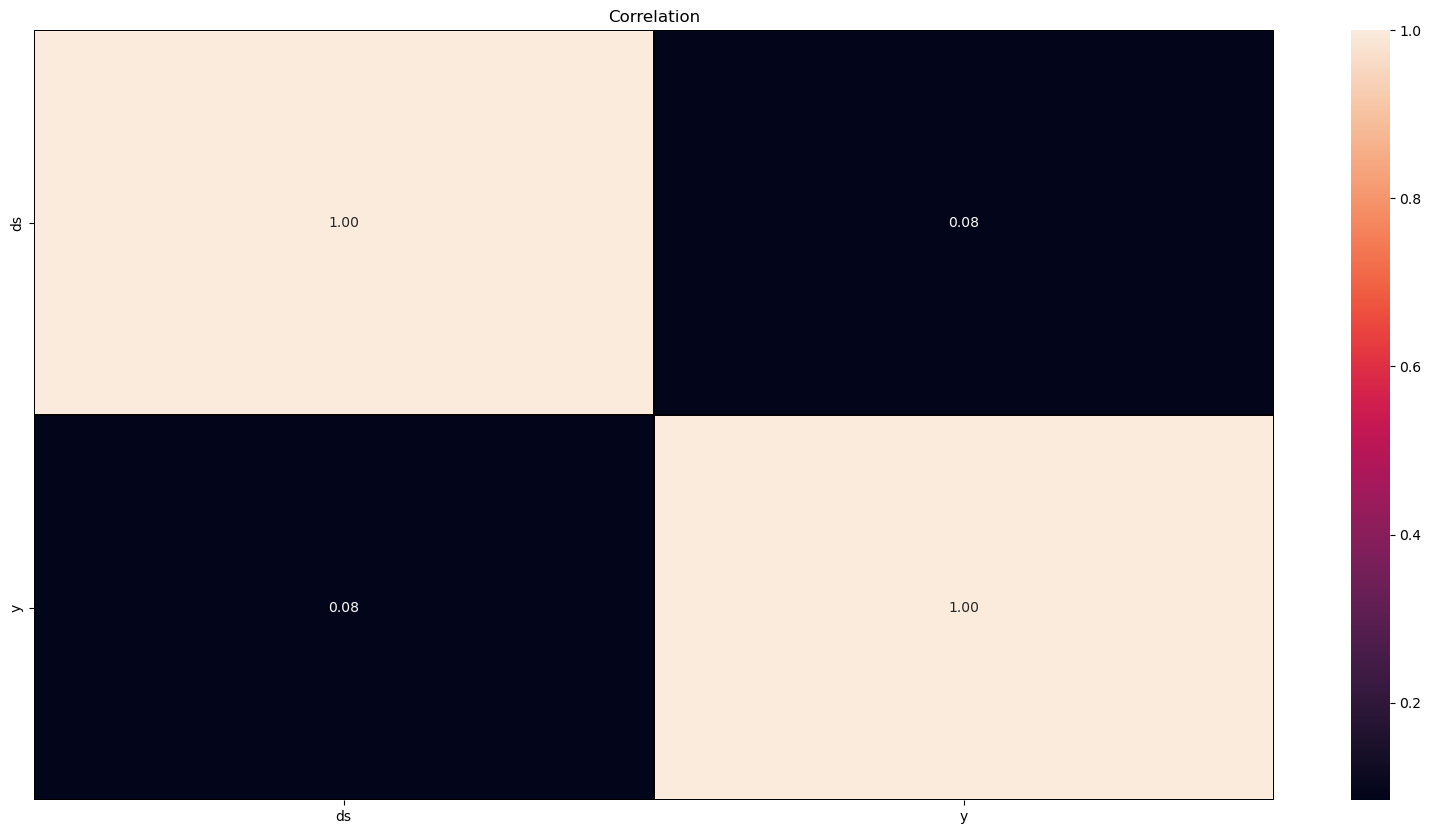

In [31]:
# checking heatmap with correlation :

plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot = True, linewidth = 0.2, linecolor = 'black', fmt = '0.2f')
plt.title('Correlation')
plt.show()